In [3]:
import pandas as pd
import numpy as np

import scipy.stats as stats
from scipy.stats import shapiro, chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

In [4]:
moscow = pd.read_csv('Moscow_data_official.csv', sep=';', decimal=',')
moscow.drop('cases.1', axis=1, inplace=True)
moscow.head()

,year,month,cases,death,calculated_death,officcial_death_per_100k,calculated_death_per_100k,cases_per_100k
0,2020,2,817,4,192,0.030534,1.465649,6.236641
1,2020,3,47609,475,-189,3.625954,-1.442748,363.427481
2,2020,4,125071,1775,1904,13.549618,14.534351,954.740458
3,2020,5,46574,1484,5865,11.328244,44.770992,355.526718
4,2020,6,19244,683,3894,5.213740,29.725191,146.900763


In [5]:
def population(row):
    """
    Функция которая добавляет численность насления в 2021-2022 годах. 
    """
    if row['year'] == 2020:
        return 12678000
    elif row['year'] == 2021:
        return 12655000
    else:
        return 13015000

In [6]:
moscow['population'] = moscow.apply(population, axis=1)
moscow.head(5)

,year,month,cases,death,calculated_death,officcial_death_per_100k,calculated_death_per_100k,cases_per_100k,population
0,2020,2,817,4,192,0.030534,1.465649,6.236641,12678000
1,2020,3,47609,475,-189,3.625954,-1.442748,363.427481,12678000
2,2020,4,125071,1775,1904,13.549618,14.534351,954.740458,12678000
3,2020,5,46574,1484,5865,11.328244,44.770992,355.526718,12678000
4,2020,6,19244,683,3894,5.213740,29.725191,146.900763,12678000


In [7]:
moscow_death_total = pd.read_excel('moscow_data.xlsx')
moscow_death_total[['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь ', 'Декабрь']] = moscow_death_total[['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь ', 'Декабрь']].astype('float64')
moscow_death_total.columns = ['year', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

pre_covid_moscow_death = moscow_death_total[~moscow_death_total['year'].isin([2020, 2021, 2022, 2023, 2024])]
covid_moscow_death = moscow_death_total[moscow_death_total['year'].isin([2020, 2021, 2022])]

covid_moscow_death

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
14,2020,10913.0,9864.0,10223.0,11834.0,15713.0,13126.0,10771.0,10972.0,11153.0,13710.0,14456.0,16546.0
15,2021,16347.0,12658.0,13213.0,12803.0,13705.0,16406.0,17334.0,12753.0,11855.0,14727.0,16553.0,14481.0
16,2022,14376.0,14496.0,11551.0,9144.0,9345.0,8914.0,8384.0,9755.0,10008.0,9703.0,10008.0,11304.0


In [8]:
def shapiro_calculations(df):
    """
    Функция принимает на вход датафрем и определяет номрмальность распределения данных в каждом месяце (т.е. исключая столбик с годами)
    """
    for month in df.columns:
        if month == 'year':
            continue
        
        stat, pval = shapiro(df[month])
        
        if pval > 0.05: 
            print(month.upper())
            print('Данные распредлены нормально')
            print(f'Statistic: {stat:.5f}, pval: {pval:.5f}')
        
        else:
            print(month.upper())
            print('Данныке НЕ распределены нормально')
            print(f'Statistic: {stat:.5f}, pval: {pval:.5f}')
            sns.kdeplot(df[month])
            plt.show()
            
        print('-'*20)

JAN
Данные распредлены нормально
Statistic: 0.89295, pval: 0.08915
--------------------
FEB
Данные распредлены нормально
Statistic: 0.90334, pval: 0.12609
--------------------
MAR
Данные распредлены нормально
Statistic: 0.87744, pval: 0.05344
--------------------
APR
Данные распредлены нормально
Statistic: 0.93719, pval: 0.38355
--------------------
MAY
Данные распредлены нормально
Statistic: 0.91146, pval: 0.16550
--------------------
JUN
Данные распредлены нормально
Statistic: 0.96778, pval: 0.84562
--------------------
JUL
Данныке НЕ распределены нормально
Statistic: 0.48837, pval: 0.00000


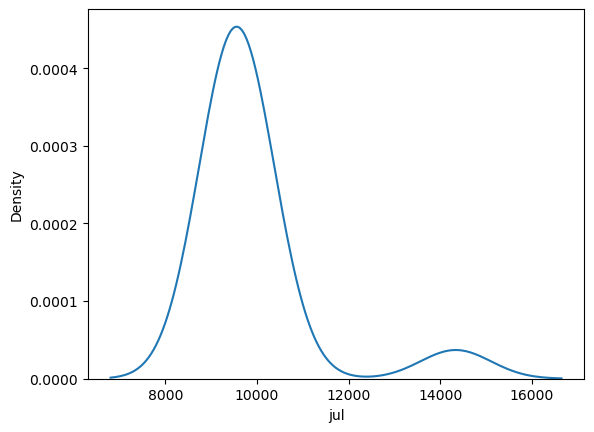

--------------------
AUG
Данныке НЕ распределены нормально
Statistic: 0.52567, pval: 0.00001


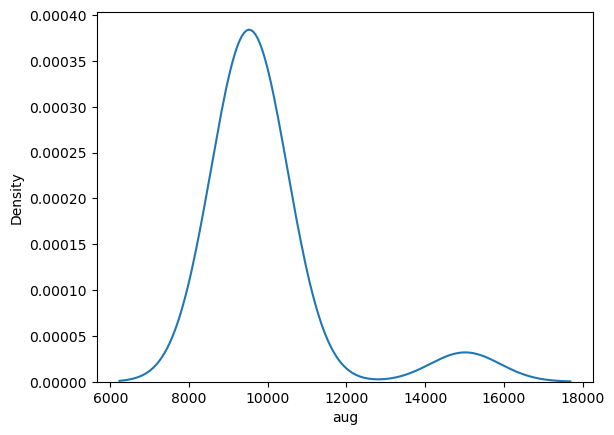

--------------------
SEP
Данные распредлены нормально
Statistic: 0.91081, pval: 0.16189
--------------------
OCT
Данные распредлены нормально
Statistic: 0.88911, pval: 0.07849
--------------------
NOV
Данные распредлены нормально
Statistic: 0.97619, pval: 0.94664
--------------------
DEC
Данные распредлены нормально
Statistic: 0.88495, pval: 0.06838
--------------------


In [9]:
shapiro_calculations(pre_covid_moscow_death)

In [10]:
# Нахожу выбросы, которые находятся выше/ниже 3-х межквартильных занчений, т.к. в дальнейшем я буду рабоатать со средними, поэтому на этом этапе принимаю решение избавиться от таких выбросов 

pre_covid_outlers_list = {}

for month in pre_covid_moscow_death.columns:
    if month == 'year':
        continue
    
    iqr = pre_covid_moscow_death[month].quantile(0.75) - pre_covid_moscow_death[month].quantile(0.25)
    upper_bound = pre_covid_moscow_death[month].quantile(0.75) + 3 * iqr
    lower_bound = pre_covid_moscow_death[month].quantile(0.25) - 3 * iqr
    outlers = [x for x in pre_covid_moscow_death[month] if x > upper_bound or x < lower_bound] 
    
    pre_covid_outlers_list[month] = outlers
    
pre_covid_outlers_list

{'jan': [],
 'feb': [],
 'mar': [],
 'apr': [],
 'may': [],
 'jun': [],
 'jul': [14340.0],
 'aug': [15016.0],
 'sep': [],
 'oct': [9350.0],
 'nov': [],
 'dec': []}

In [11]:
jul_max, jul_median = pre_covid_moscow_death['jul'].max(), pre_covid_moscow_death['jul'].median()
aug_max, aug_median = pre_covid_moscow_death['aug'].max(), pre_covid_moscow_death['aug'].median()


pre_covid_moscow_death['aug'].replace(aug_max, aug_median, inplace=True)
pre_covid_moscow_death['jul'].replace(jul_max, jul_median, inplace=True)

In [12]:
shapiro_calculations(pre_covid_moscow_death)

JAN
Данные распредлены нормально
Statistic: 0.89295, pval: 0.08915
--------------------
FEB
Данные распредлены нормально
Statistic: 0.90334, pval: 0.12609
--------------------
MAR
Данные распредлены нормально
Statistic: 0.87744, pval: 0.05344
--------------------
APR
Данные распредлены нормально
Statistic: 0.93719, pval: 0.38355
--------------------
MAY
Данные распредлены нормально
Statistic: 0.91146, pval: 0.16550
--------------------
JUN
Данные распредлены нормально
Statistic: 0.96778, pval: 0.84562
--------------------
JUL
Данные распредлены нормально
Statistic: 0.93123, pval: 0.31751
--------------------
AUG
Данные распредлены нормально
Statistic: 0.94328, pval: 0.46195
--------------------
SEP
Данные распредлены нормально
Statistic: 0.91081, pval: 0.16189
--------------------
OCT
Данные распредлены нормально
Statistic: 0.88911, pval: 0.07849
--------------------
NOV
Данные распредлены нормально
Statistic: 0.97619, pval: 0.94664
--------------------
DEC
Данные распредлены нормально

In [13]:
pre_covid_moscow_death.head(5)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2006,11814.0,10291.0,11545.0,9951.0,10817.0,10427.0,9661.0,10071.0,10277.0,10939.0,10627.0,10622.0
1,2007,11644.0,10015.0,11036.0,10213.0,10889.0,9606.0,9644.0,10098.0,9595.0,10837.0,10350.0,10403.0
2,2008,11622.0,10151.0,10965.0,10558.0,10411.0,9840.0,10062.0,9472.0,10396.0,10501.0,9502.0,10824.0
3,2009,11186.0,9956.0,10660.0,10185.0,9548.0,9598.0,9516.0,8905.0,9476.0,10613.0,9923.0,10547.0
4,2010,10430.0,9573.0,10528.0,9591.0,9482.0,9529.0,9579.5,9539.0,9573.0,9350.0,9091.0,9664.0


In [14]:
# Создаю датафрейм с населением москвы за каждый год
year = list(range(2006, 2023))
population = np.array([10923, 11091, 11186, 11281, 11504, 11541, 11613, 11979, 12108, 12198, 12330, 12381, 12506, 12615, 12678, 12655, 13015]) * 1000 # Изначальные данные на 1000 чел., поэтому привожу их к абсолютным занчениям
population_by_year_moscow = pd.DataFrame({
    'year': year,
    'population': population
})

# Джойним значение населения из датафрейма выше 
pre_covid_moscow_death = pre_covid_moscow_death.merge(population_by_year_moscow, on='year', how='inner')
covid_moscow_death = covid_moscow_death.merge(population_by_year_moscow, on='year', how='inner')
#pre_covid_moscow_death['population'] = pre_covid_moscow_death['population'].astype('float64')
pre_covid_moscow_death

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,population
0,2006,11814.0,10291.0,11545.0,9951.0,10817.0,10427.0,9661.0,10071.0,10277.0,10939.0,10627.0,10622.0,10923000
1,2007,11644.0,10015.0,11036.0,10213.0,10889.0,9606.0,9644.0,10098.0,9595.0,10837.0,10350.0,10403.0,11091000
2,2008,11622.0,10151.0,10965.0,10558.0,10411.0,9840.0,10062.0,9472.0,10396.0,10501.0,9502.0,10824.0,11186000
3,2009,11186.0,9956.0,10660.0,10185.0,9548.0,9598.0,9516.0,8905.0,9476.0,10613.0,9923.0,10547.0,11281000
4,2010,10430.0,9573.0,10528.0,9591.0,9482.0,9529.0,9579.5,9539.0,9573.0,9350.0,9091.0,9664.0,11504000
5,2011,10335.0,9219.0,10067.0,9483.0,9424.0,8801.0,9111.0,9476.0,9325.0,9830.0,9692.0,9660.0,11541000
6,2012,10354.0,10010.0,10317.0,9695.0,9690.0,9167.0,9193.0,9184.0,9233.0,10493.0,9577.0,10576.0,11613000
7,2013,11184.0,9396.0,10084.0,9894.0,9724.0,8520.0,9384.0,9261.0,9210.0,10143.0,9434.0,9967.0,11979000
8,2014,10311.0,9235.0,10256.0,9884.0,10219.0,8924.0,9547.0,9054.0,9821.0,10315.0,9042.0,10783.0,12108000
9,2015,11042.0,10146.0,10886.0,10271.0,9742.0,9639.0,9612.0,9476.0,9815.0,10554.0,9962.0,10809.0,12198000


In [15]:
pre_covid_moscow_death

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,population
0,2006,11814.0,10291.0,11545.0,9951.0,10817.0,10427.0,9661.0,10071.0,10277.0,10939.0,10627.0,10622.0,10923000
1,2007,11644.0,10015.0,11036.0,10213.0,10889.0,9606.0,9644.0,10098.0,9595.0,10837.0,10350.0,10403.0,11091000
2,2008,11622.0,10151.0,10965.0,10558.0,10411.0,9840.0,10062.0,9472.0,10396.0,10501.0,9502.0,10824.0,11186000
3,2009,11186.0,9956.0,10660.0,10185.0,9548.0,9598.0,9516.0,8905.0,9476.0,10613.0,9923.0,10547.0,11281000
4,2010,10430.0,9573.0,10528.0,9591.0,9482.0,9529.0,9579.5,9539.0,9573.0,9350.0,9091.0,9664.0,11504000
5,2011,10335.0,9219.0,10067.0,9483.0,9424.0,8801.0,9111.0,9476.0,9325.0,9830.0,9692.0,9660.0,11541000
6,2012,10354.0,10010.0,10317.0,9695.0,9690.0,9167.0,9193.0,9184.0,9233.0,10493.0,9577.0,10576.0,11613000
7,2013,11184.0,9396.0,10084.0,9894.0,9724.0,8520.0,9384.0,9261.0,9210.0,10143.0,9434.0,9967.0,11979000
8,2014,10311.0,9235.0,10256.0,9884.0,10219.0,8924.0,9547.0,9054.0,9821.0,10315.0,9042.0,10783.0,12108000
9,2015,11042.0,10146.0,10886.0,10271.0,9742.0,9639.0,9612.0,9476.0,9815.0,10554.0,9962.0,10809.0,12198000


In [16]:
pre_covid_moscow_death_ = pre_covid_moscow_death.copy()
pre_covid_moscow_death_.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,population
0,2006,11814.0,10291.0,11545.0,9951.0,10817.0,10427.0,9661.0,10071.0,10277.0,10939.0,10627.0,10622.0,10923000
1,2007,11644.0,10015.0,11036.0,10213.0,10889.0,9606.0,9644.0,10098.0,9595.0,10837.0,10350.0,10403.0,11091000
2,2008,11622.0,10151.0,10965.0,10558.0,10411.0,9840.0,10062.0,9472.0,10396.0,10501.0,9502.0,10824.0,11186000
3,2009,11186.0,9956.0,10660.0,10185.0,9548.0,9598.0,9516.0,8905.0,9476.0,10613.0,9923.0,10547.0,11281000
4,2010,10430.0,9573.0,10528.0,9591.0,9482.0,9529.0,9579.5,9539.0,9573.0,9350.0,9091.0,9664.0,11504000


In [17]:
for month in pre_covid_moscow_death_.iloc[:, 1:-1].columns:
    pre_covid_moscow_death_[f'{month}'] = pre_covid_moscow_death_.apply(lambda x: x[month] / x['population'] * 100000, axis=1)
    
pre_covid_moscow_death_.head()

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,population
0,2006,108.157100,94.214044,105.694406,91.101346,99.029571,95.459123,88.446398,92.199945,94.085874,100.146480,97.290122,97.244347,10923000
1,2007,104.986025,90.298440,99.504102,92.083671,98.178703,86.610765,86.953386,91.046795,86.511586,97.709855,93.318907,93.796772,11091000
2,2008,103.897729,90.747363,98.024316,94.385839,93.071697,87.967102,89.951725,84.677275,92.937601,93.876274,84.945468,96.763812,11186000
3,2009,99.157876,88.254587,94.495169,90.284549,84.637887,85.081110,84.354224,78.938037,83.999645,94.078539,87.962060,93.493485,11281000
4,2010,90.664117,83.214534,91.515994,83.371001,82.423505,82.832058,83.271036,82.918985,83.214534,81.276078,79.024687,84.005563,11504000


In [18]:
avg_monthly_death = pre_covid_moscow_death_.mean().to_frame().T
avg_monthly_death.drop(columns=['year', 'population'], inplace=True)
avg_monthly_death = avg_monthly_death.round(5)

avg_monthly_death

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,94.73608,83.15415,90.0943,84.82399,84.83352,80.16713,81.17487,80.93637,81.87445,88.27846,82.92448,88.80939


In [19]:
avg_monthly_death.values

array([[94.73608, 83.15415, 90.0943 , 84.82399, 84.83352, 80.16713,
        81.17487, 80.93637, 81.87445, 88.27846, 82.92448, 88.80939]])

In [20]:
covid_moscow_death_ = covid_moscow_death.copy().reset_index()
covid_moscow_death_.drop(columns='index', inplace=True, axis=1)
covid_moscow_death_

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,population
0,2020,10913.0,9864.0,10223.0,11834.0,15713.0,13126.0,10771.0,10972.0,11153.0,13710.0,14456.0,16546.0,12678000
1,2021,16347.0,12658.0,13213.0,12803.0,13705.0,16406.0,17334.0,12753.0,11855.0,14727.0,16553.0,14481.0,12655000
2,2022,14376.0,14496.0,11551.0,9144.0,9345.0,8914.0,8384.0,9755.0,10008.0,9703.0,10008.0,11304.0,13015000


In [21]:
for month in covid_moscow_death_.iloc[:, 1:-1].columns:
    covid_moscow_death_[f'{month}'] = covid_moscow_death_.apply(lambda x: x[month] / x['population'] * 100000, axis=1)
covid_moscow_death_ = covid_moscow_death_.round(5)

In [22]:
avg_monthly_death

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,94.73608,83.15415,90.0943,84.82399,84.83352,80.16713,81.17487,80.93637,81.87445,88.27846,82.92448,88.80939


In [23]:
columns_to_keep = [col for col in covid_moscow_death_.columns if col not in ['year', 'population']]
df_2020 = covid_moscow_death_[covid_moscow_death_['year'] == 2020][columns_to_keep]
df_2021 = covid_moscow_death_[covid_moscow_death_['year'] == 2021][columns_to_keep].reset_index().drop('index', axis=1)
df_2022 = covid_moscow_death_[covid_moscow_death_['year'] == 2022][columns_to_keep].reset_index().drop('index', axis=1)

df_2020 = df_2020 - avg_monthly_death
df_2021 = df_2021 - avg_monthly_death
df_2022 = df_2022 - avg_monthly_death

covid_cummaulative_mortality = pd.concat([df_2020, df_2021, df_2022]).reset_index().drop('index', axis=1)
covid_cummaulative_mortality['year'] = [2020, 2021, 2022]

covid_cummaulative_mortality = (pd.DataFrame(covid_cummaulative_mortality.stack())
 .reset_index()
 .rename(columns={'level_0': 'year', 'level_1':'month', 0: 'death_per_100k_V2'}, )
)

covid_cummaulative_mortality['year'] = covid_cummaulative_mortality['year'].apply(lambda x: 2020 if x == 0 else x)
covid_cummaulative_mortality['year'] = covid_cummaulative_mortality['year'].apply(lambda x: 2021 if x == 1 else x)
covid_cummaulative_mortality['year'] = covid_cummaulative_mortality['year'].apply(lambda x: 2022 if x == 2 else x)

month_dict = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5, 
    'jun': 6, 
    'jul': 7, 
    'aug': 8, 
    'sep': 9, 
    'oct': 10, 
    'nov': 11, 
    'dec': 12
}

covid_cummaulative_mortality['month'] = covid_cummaulative_mortality['month'].map(month_dict) 
covid_cummaulative_mortality.dropna(inplace=True)

covid_cummaulative_mortality['month'] = covid_cummaulative_mortality['month'].astype('int64')
covid_cummaulative_mortality = pd.merge(covid_cummaulative_mortality, moscow[['year', 'month', 'officcial_death_per_100k', 'calculated_death_per_100k']], on=['year', 'month'], how='left')
covid_cummaulative_mortality.dropna(inplace=True)

covid_cummaulative_mortality

,year,month,death_per_100k_V2,officcial_death_per_100k,calculated_death_per_100k
1,2020,2,-5.35008,0.030534,1.465649
2,2020,3,-9.45855,3.625954,-1.442748
3,2020,4,8.51881,13.549618,14.534351
4,2020,5,39.10559,11.328244,44.770992
5,2020,6,23.36655,5.213740,29.725191
6,2020,7,3.78333,2.786260,9.793893
7,2020,8,5.60725,3.007634,11.358779
8,2020,9,6.09684,10.671756,12.526718
9,2020,10,19.86163,16.625954,25.519084
10,2020,11,31.09981,17.045802,36.412214


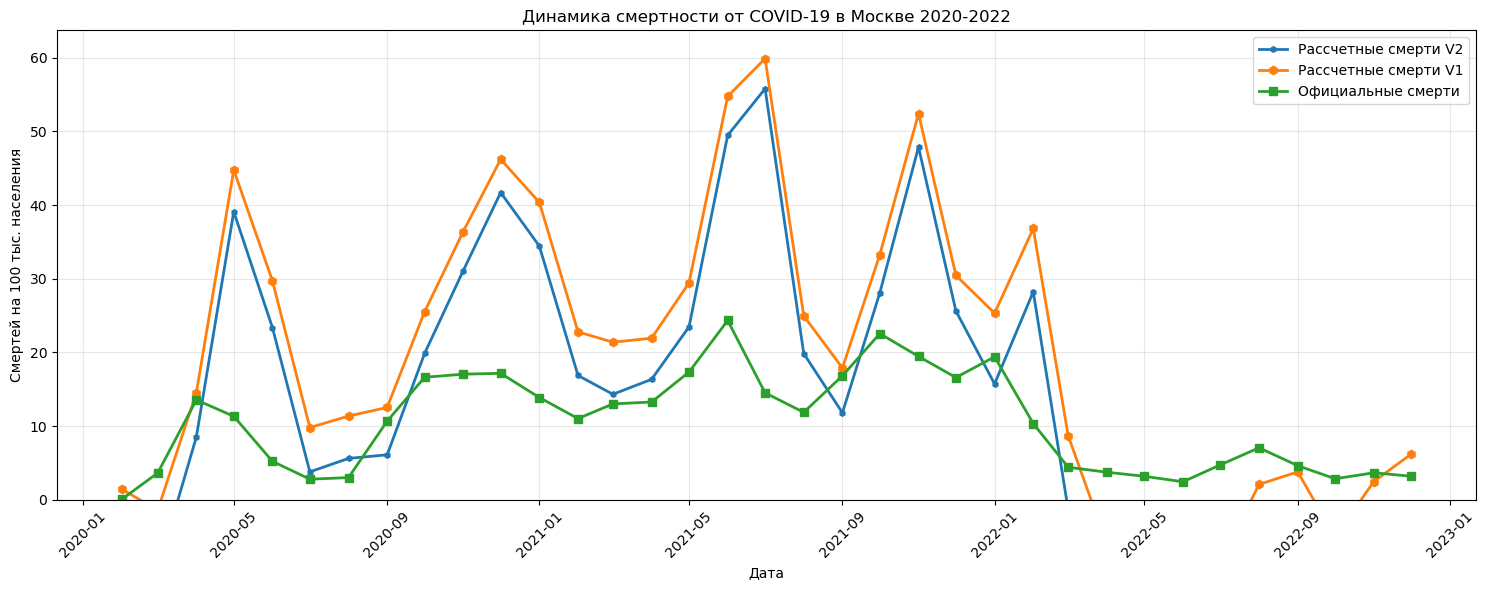

In [24]:
# Создаем дату из года и месяца
covid_cummaulative_mortality['date'] = pd.to_datetime(
    covid_cummaulative_mortality['year'].astype(str) + '-' + 
    covid_cummaulative_mortality['month'].astype(str) + '-01'
)

# Сортируем по дате
covid_cummaulative_mortality = covid_cummaulative_mortality.sort_values('date')

# Фильтруем данные с февраля 2020 до конца 2022
start_date = '2020-02-01'
end_date = '2022-12-31'
continuous_df = covid_cummaulative_mortality[
    (covid_cummaulative_mortality['date'] >= start_date) & 
    (covid_cummaulative_mortality['date'] <= end_date)
]

# Для основного датафрейма
moscow['date'] = pd.to_datetime(moscow['year'].astype(str) + '-' + moscow['month'].astype(str) + '-01')
moscow = moscow.sort_values('date')
filtered_df = moscow[(moscow['date'] >= '2020-02-01') & (moscow['date'] <= '2022-12-31')]

# Строим график
plt.figure(figsize=(15, 6))
plt.plot(continuous_df['date'], continuous_df['death_per_100k_V2'], marker='h', linewidth=2, markersize=4, label='Рассчетные смерти V2')
plt.plot(filtered_df['date'], filtered_df['calculated_death_per_100k'], marker='h', linewidth=2, label='Рассчетные смерти V1')
plt.plot(filtered_df['date'], filtered_df['officcial_death_per_100k'], marker='s', linewidth=2, label='Официальные смерти')
plt.xlabel('Дата')
plt.ylabel('Смертей на 100 тыс. населения')
plt.title('Динамика смертности от COVID-19 в Москве 2020-2022')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

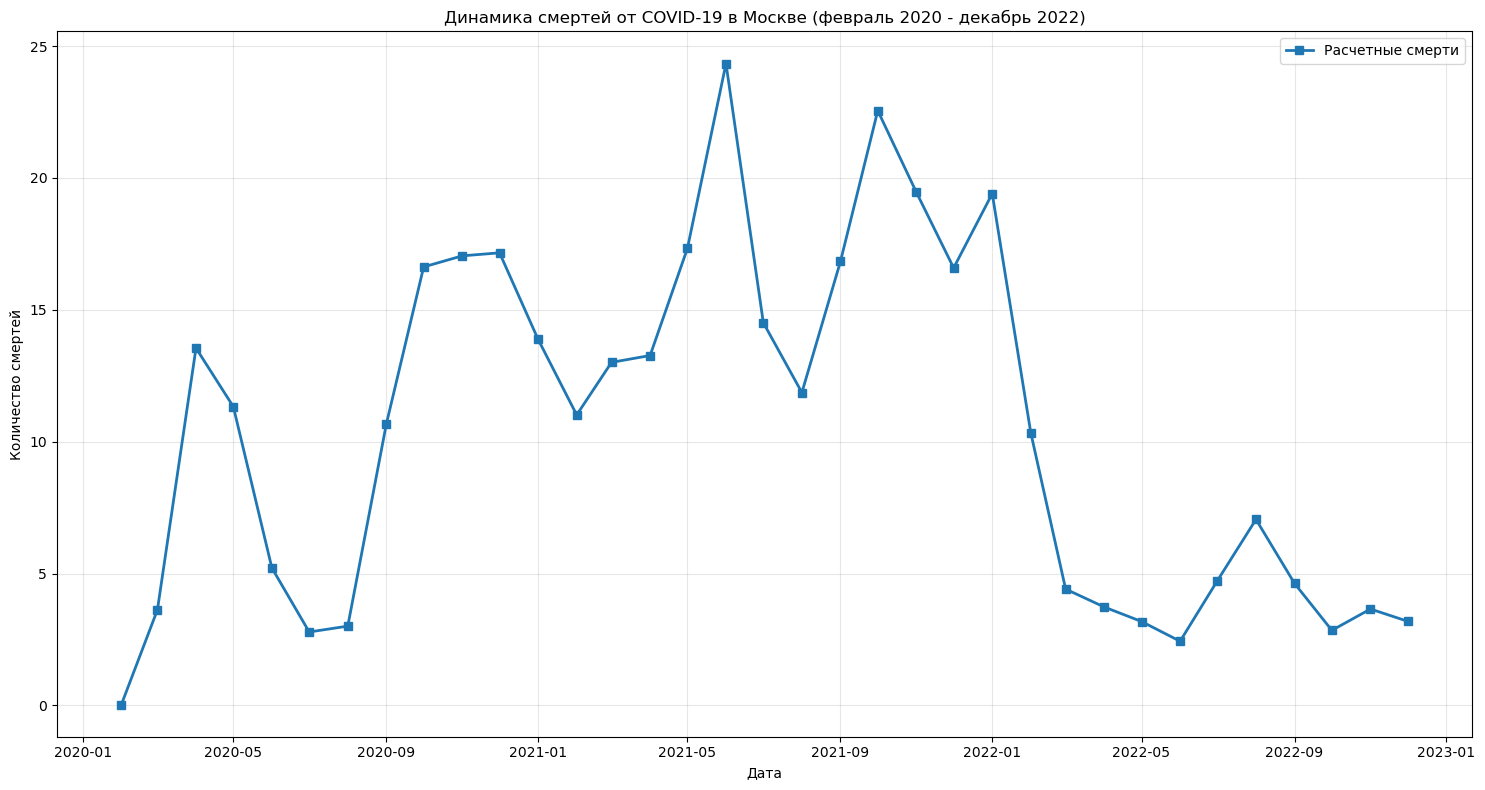

In [25]:
# Строим график
plt.figure(figsize=(15, 8))
plt.plot(filtered_df['date'], filtered_df['officcial_death_per_100k'], marker='s', linewidth=2, label='Расчетные смерти')
plt.xlabel('Дата')
plt.ylabel('Количество смертей')
plt.title('Динамика смертей от COVID-19 в Москве (февраль 2020 - декабрь 2022)')
plt.legend()
plt.grid(True, alpha=0.3)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
moscow.head(5)

,year,month,cases,death,calculated_death,officcial_death_per_100k,calculated_death_per_100k,cases_per_100k,population,date
0,2020,2,817,4,192,0.030534,1.465649,6.236641,12678000,2020-02-01
1,2020,3,47609,475,-189,3.625954,-1.442748,363.427481,12678000,2020-03-01
2,2020,4,125071,1775,1904,13.549618,14.534351,954.740458,12678000,2020-04-01
3,2020,5,46574,1484,5865,11.328244,44.770992,355.526718,12678000,2020-05-01
4,2020,6,19244,683,3894,5.213740,29.725191,146.900763,12678000,2020-06-01


In [27]:
covid_cummaulative_mortality.drop(columns='date', inplace=True)
covid_cummaulative_mortality

,year,month,death_per_100k_V2,officcial_death_per_100k,calculated_death_per_100k
1,2020,2,-5.35008,0.030534,1.465649
2,2020,3,-9.45855,3.625954,-1.442748
3,2020,4,8.51881,13.549618,14.534351
4,2020,5,39.10559,11.328244,44.770992
5,2020,6,23.36655,5.213740,29.725191
6,2020,7,3.78333,2.786260,9.793893
7,2020,8,5.60725,3.007634,11.358779
8,2020,9,6.09684,10.671756,12.526718
9,2020,10,19.86163,16.625954,25.519084
10,2020,11,31.09981,17.045802,36.412214


In [28]:
stat, pval = stats.spearmanr(covid_cummaulative_mortality['death_per_100k_V2'], covid_cummaulative_mortality['officcial_death_per_100k'])
if pval < 0.05:
    print('Данные отличаются статистически')
else:
    print('Нет стат различий')
print(f'Satistic: {stat}')

Данные отличаются статистически
Satistic: 0.7837535014005603


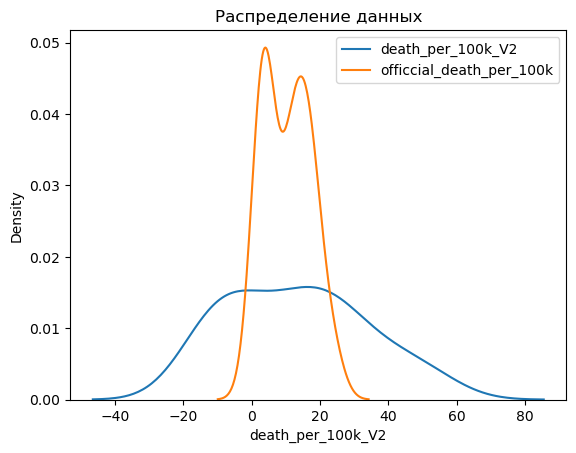

In [29]:
sns.kdeplot(covid_cummaulative_mortality['death_per_100k_V2'], label='death_per_100k_V2')
sns.kdeplot(covid_cummaulative_mortality['officcial_death_per_100k'], label='officcial_death_per_100k')
plt.title('Распределение данных')
plt.legend()
plt.show()

In [30]:
vied_period = covid_cummaulative_mortality[covid_cummaulative_mortality['death_per_100k_V2'] > 0]

In [45]:
covid_cummaulative_mortality

,year,month,death_per_100k_V2,officcial_death_per_100k,calculated_death_per_100k
1,2020,2,-5.35008,0.030534,1.465649
2,2020,3,-9.45855,3.625954,-1.442748
3,2020,4,8.51881,13.549618,14.534351
4,2020,5,39.10559,11.328244,44.770992
5,2020,6,23.36655,5.213740,29.725191
6,2020,7,3.78333,2.786260,9.793893
7,2020,8,5.60725,3.007634,11.358779
8,2020,9,6.09684,10.671756,12.526718
9,2020,10,19.86163,16.625954,25.519084
10,2020,11,31.09981,17.045802,36.412214


In [31]:
vied_period[['officcial_death_per_100k', 'death_per_100k_V2']].corr()

,officcial_death_per_100k,death_per_100k_V2
officcial_death_per_100k,1.000000,0.522824
death_per_100k_V2,0.522824,1.000000


In [32]:
vied_period[['calculated_death_per_100k', 'officcial_death_per_100k']].corr()

,calculated_death_per_100k,officcial_death_per_100k
calculated_death_per_100k,1.000000,0.528001
officcial_death_per_100k,0.528001,1.000000


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
len(vied_period['calculated_death_per_100k']), len(vied_period['officcial_death_per_100k'])

(23, 23)

In [35]:
linear_model_v1 = vied_period[['officcial_death_per_100k', 'calculated_death_per_100k']]

X = linear_model_v1[['officcial_death_per_100k']]
y = linear_model_v1['calculated_death_per_100k']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("First version of data")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

First version of data
Mean Squared Error: 242.24345040260127
R-squared: -0.0966265077485382
Coefficients: [1.57374259]
Intercept: 6.8750125435820735


In [36]:
linear_model_v2 = vied_period[['officcial_death_per_100k', 'death_per_100k_V2']]

X = linear_model_v2[['officcial_death_per_100k']]
y = linear_model_v2['death_per_100k_V2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Second version of data")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Second version of data
Mean Squared Error: 260.7098572042089
R-squared: -0.09211264025424715
Coefficients: [1.60199195]
Intercept: 0.3980520658113136


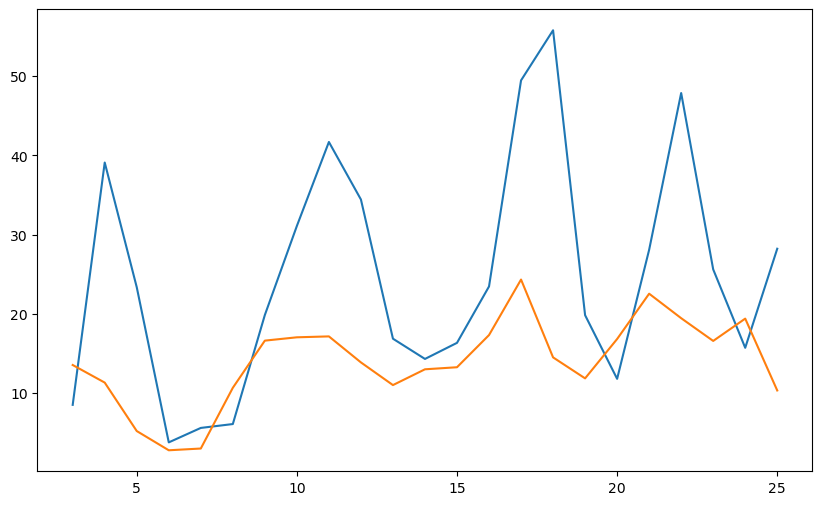

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(vied_period['death_per_100k_V2'], label='death_per_100k_V2')
plt.plot(vied_period['officcial_death_per_100k'], label='officcial_death_per_100k')
plt.show()

In [38]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction
from Bio.SeqFeature import FeatureLocation

import re

In [40]:
def find_sequence_pattern(genome_file, pattern):
    """
    Поиск определенной последовательности в геноме
    """
    results = []
    
    # Чтение генома из файла
    for record in SeqIO.parse(genome_file, 'fasta'):
        sequence = str(record.seq).upper()
        pattern_upper = pattern.upper()
        
        # Поиск всех вхождений
        positions = []
        start = 0
        while True:
            pos = sequence.find(pattern_upper, start)
            if pos == -1:
                break
            positions.append(pos)
            start = pos + 1
        
        results.append({
            'record_id': record.id,
            'pattern': pattern,
            'positions': positions,
            'count': len(positions)
        })
    
    return results

# поиск паттернов
genome_file = 'genomic.fna'
pattern = 'ATG'  
results = find_sequence_pattern(genome_file, pattern)
for result in results:
    print(f"В {result['record_id']} найдено {result['count']} вхождений '{result['pattern']}'")

В NC_045512.2 найдено 725 вхождений 'ATG'


In [41]:
def find_orfs(sequence, min_length=300):
    """
    Поиск открытых рамок считывания (ORF) 
    """
    start_codon = 'ATG'
    stop_codons = ['TAA', 'TAG', 'TGA']
    
    orfs = []
    sequence = str(sequence).upper()
    
    for frame in range(3):
        for i in range(frame, len(sequence) - 2, 3):
            codon = sequence[i:i+3]
            
            if codon == start_codon:
                # Ищем стоп-кодон
                for j in range(i + 3, len(sequence) - 2, 3):
                    stop_codon = sequence[j:j+3]
                    if stop_codon in stop_codons:
                        orf_length = j + 3 - i
                        if orf_length >= min_length:
                            orfs.append({
                                'start': i,
                                'end': j + 3,
                                'length': orf_length,
                                'frame': frame + 1,
                                'sequence': sequence[i:j+3]
                            })
                        break
    
    return sorted(orfs, key=lambda x: x['length'], reverse=True)

for record in SeqIO.parse('genomic.fna', 'fasta'):
    orfs = find_orfs(record.seq, min_length=100)
    print(f'В {record.id} найдено {len(orfs)} ORF длиной > 100 п.н.')

В NC_045512.2 найдено 269 ORF длиной > 100 п.н.


In [44]:
covid_moscow_death

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,population
0,2020,10913.0,9864.0,10223.0,11834.0,15713.0,13126.0,10771.0,10972.0,11153.0,13710.0,14456.0,16546.0,12678000
1,2021,16347.0,12658.0,13213.0,12803.0,13705.0,16406.0,17334.0,12753.0,11855.0,14727.0,16553.0,14481.0,12655000
2,2022,14376.0,14496.0,11551.0,9144.0,9345.0,8914.0,8384.0,9755.0,10008.0,9703.0,10008.0,11304.0,13015000
